# Data Exploration Cleaning
* Import libraries and DataFrames, begin cleaning, analysing, and organizing data. Determine potential targets and features

In [543]:
# # pip installs
# !pip install category_encoders==2.*
# !pip3 install xgboost
# !pip install eli5

In [544]:
# import libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost
from sklearn.compose import ColumnTransformer
from scipy.stats import randint
from scipy.stats import uniform
import numpy as np
import eli5
from eli5.sklearn import PermutationImportance

In [545]:
# Ignore default evaluation metric warnings
warnings.filterwarnings('ignore', message='default evaluation metric')

In [546]:
# read in dataset
file_path = 'Mental_Health_in_Tech_2016.csv'

df = pd.read_csv(file_path)

In [547]:
column_dict = {'Are you self-employed?': 'self_employed',
       'How many employees does your company or organization have?': 'number_of_employees',
       'Is your employer primarily a tech company/organization?': 'tech_company',
       'Is your primary role within your company related to tech/IT?': 'tech_role',
       'Does your employer provide mental health benefits as part of healthcare coverage?': 'coverage_Offered',
       'Do you know the options for mental health care available under your employer-provided coverage?': 'familiar_with_coverage_options',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'employer_discussed',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'Employer_resources_available',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?' : 'protected_anonymity',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:' : 'is_mental_health_leave_accepted',
       'Do you think that discussing a mental health disorder with your employer would have negative consequences?' : 'discussion_neg_consequences_mental',
       'Do you think that discussing a physical health issue with your employer would have negative consequences?' : 'disccusion_neg_consequences_physical',
       'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'discuss_coworkers',
       'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?' : 'discuss_supervisor',
       'Do you feel that your employer takes mental health as seriously as physical health?' : 'employer_mental_physical_health_equal',
       'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?' : 'neg_workplace_consequences',
       'Do you have medical coverage which includes treatment of mental health issues?': 'Insurance_covered',
       'Do you know local or online resources to seek help for a mental health disorder?' : 'aware_of_resources_seeking_help',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'reveal_diagnosis_clients',
       'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?' : 'revealing_diagnoses_neg_impact_client',
       'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?' : 'reveal_diagnosis_coworkers_or_Employees',
       'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'revealing_diagnoses_neg_impact_coworkers',
       'Do you believe your productivity is ever affected by a mental health issue?' : 'productivity_affected',
       'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'productivity_affected_time_percentage',
       'Do you have previous employers?' : 'previous_employers',
       'Have your previous employers provided mental health benefits?': 'previous_employers_coverage_provided',
       'Were you aware of the options for mental health care provided by your previous employers?': 'previous_employers_aware_coverage',
       'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?' : 'previous_employers_discussed',
       'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'previous_employers_resources_available',
       'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'previous_employers_protected_anonymity',
       'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'previous_employers_discuss_mental_neg',
       'Do you think that discussing a physical health issue with previous employers would have negative consequences?' : 'previous_employers_discuss_physical_neg',
       'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'previous_employers_discuss_coworkers',
       'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'previous_employers_discuss_supervisors',
       'Did you feel that your previous employers took mental health as seriously as physical health?': 'previous_employers_mental_physical_health_equal',
       'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'previous_employers_neg_workplace_consequences',
       'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'Interview_disucess_physical',
       'Why or why not?': 'Interview_physical_why_whynot',
       'Would you bring up a mental health issue with a potential employer in an interview?': 'Interview_discuss_mental',
       'Why or why not?.1': 'Interview_mental_why_whynot',
       'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'neg_career_impact',
       'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'neg_colleague_view',
       'How willing would you be to share with friends and family that you have a mental illness?': 'friends_family_share',
       'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'obs_poor_response_workplace',
       'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'willingness_from_other_peoples_experiences',
       'Do you have a family history of mental illness?': 'family_history',
       'Have you had a mental health disorder in the past?': 'past_disorder',
       'Do you currently have a mental health disorder?': 'current_disorder',
       'If yes, what condition(s) have you been diagnosed with?': 'diagnosed_conditions',
       'If maybe, what condition(s) do you believe you have?': 'possible_conditions',
       'Have you been diagnosed with a mental health condition by a medical professional?': 'professional_diagnosis',
       'If so, what condition(s) were you diagnosed with?': 'professional_diagnosed_conditions',
       'Have you ever sought treatment for a mental health issue from a mental health professional?': 'sought_treatment_professional',
       'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'does_effective_treatment_impact_work',
       'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'does_ineffective_treatment_impact_work',
       'What is your age?': 'age',
       'What is your gender?': 'gender',
       'What country do you live in?': 'country',
       'What US state or territory do you live in?': 'US_state',
       'What country do you work in?': 'country_work',
       'What US state or territory do you work in?': 'US_state_work',
       'Which of the following best describes your work position?': 'work_position',
       'Do you work remotely?': 'remote_work'}

In [548]:
def clean(df):
    #rename columns based on dictionary values     
    df = df.rename(columns=column_dict)
    
    #columns used to generate a score based on a persons willingness
    #to discuss mental health in a work environment     
    willingness= ['discuss_coworkers',
                  'discuss_supervisor',
                  'reveal_diagnosis_clients',
                  'reveal_diagnosis_coworkers_or_Employees',
                  'previous_employers_discuss_coworkers',
                  'previous_employers_discuss_supervisors',
                  'Interview_discuss_mental',
                  'willingness_from_other_peoples_experiences']
    
    #Clean and adjust willingness colums to be used for generating a score    
    for col in willingness:
        majority = df[col].value_counts().index[0]
        df[col] = df[col].fillna(value=majority)
    
        df.loc[df[col].str.contains('Not applicable to me'), col] = 'No'
        df.loc[df[col].str.contains('No'), col] = 'No'
        df.loc[df[col].str.contains('Some of my previous employers'), col] = 'Maybe'
        df.loc[df[col].str.contains('Sometimes, if it comes up'), col] = 'Maybe'
        df.loc[df[col].str.contains('maybe'), col] = 'Maybe'
        df.loc[df[col].str.contains("I don't know"), col] = 'Maybe'
        df.loc[df[col].str.contains('Yes'), col] = 'Yes'
    
        df.loc[df[col].str.contains('No'), col] = '0'
        df.loc[df[col].str.contains('Maybe'), col] = '1'
        df.loc[df[col].str.contains('Yes'), col] = '2'
    
        df[col] = df[col].astype(int)
    
    #Generate score based on values in willingness columns and determine willingness based on overall score 
    df.loc[df[willingness].sum(axis=1) >= 9, 'Willingness'] = 2
    df.loc[(df[willingness].sum(axis=1) > 4) & (df[willingness].sum(axis=1) < 9), 'Willingness'] = 1
    df.loc[df[willingness].sum(axis=1) <= 4, 'Willingness'] = 0
    
    df['Willingness'] = df['Willingness'].astype(int)

    
    #Drop willingness columns from dataset to avoid leakage  
    df = df.drop(columns=willingness)
    
    #Drop High Cardinality features
    cardinality = df.select_dtypes(exclude='number').nunique()
    high_cat_features = cardinality[cardinality >40].index.to_list()
    df = df.drop(columns=high_cat_features)
    
    return df

In [549]:
df = clean(df)

In [550]:
df

,self_employed,number_of_employees,tech_company,tech_role,coverage_Offered,familiar_with_coverage_options,employer_discussed,Employer_resources_available,protected_anonymity,is_mental_health_leave_accepted,...,family_history,past_disorder,current_disorder,professional_diagnosis,sought_treatment_professional,does_effective_treatment_impact_work,does_ineffective_treatment_impact_work,age,remote_work,Willingness
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,No,Yes,No,Yes,0,Not applicable to me,Not applicable to me,39,Sometimes,1
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Yes,Yes,Yes,Yes,1,Rarely,Sometimes,29,Never,1
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,No,Maybe,No,No,1,Not applicable to me,Not applicable to me,38,Always,1
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,Yes,Yes,Yes,1,Sometimes,Sometimes,43,Sometimes,2
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Yes,Yes,Yes,Yes,1,Sometimes,Sometimes,43,Sometimes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,No,No,No,1,Not applicable to me,Not applicable to me,34,Sometimes,1
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Yes,No,No,Yes,0,Sometimes,Often,56,Sometimes,1
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Yes,Yes,Maybe,Yes,1,Rarely,Sometimes,52,Sometimes,1
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Yes,Maybe,Yes,Yes,0,Sometimes,Often,30,Sometimes,0


 # Baseline Modeling

In [551]:
# define target for Classification
target = 'Willingness'
features = df.columns.drop(target)

X = df[features]
y = df[target]

In [552]:
# Split train and test data sets
X_train, X_test = train_test_split(X, train_size=0.8, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(y, train_size=0.8, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1146, 44), (1146,), (287, 44), (287,))

In [553]:
# Establish Baseline Score from most frequent class
trn_score_mode = y_train.mode()[0]
index_series = X_train.index

y_pred = pd.Series(trn_score_mode, index = index_series)

baseline = accuracy_score(y_train, y_pred)

print('Most Common Class: ', trn_score_mode)
print('Baseline Accuracy: ', baseline)

Most Common Class:  1
Baseline Accuracy:  0.5680628272251309


## Baseline Logistic Regression model

In [554]:
# Encode Training Data
target_encoder = ce.target_encoder.TargetEncoder()

encoded = target_encoder.fit_transform(X_train, y_train)
transformed_cols = target_encoder.get_feature_names()

X_train_enc = pd.DataFrame(encoded, columns=transformed_cols)


In [555]:
# Encode Test data

encoded = target_encoder.transform(X_test, y_test)

X_test_enc = pd.DataFrame(encoded, columns=transformed_cols)

In [556]:
model = make_pipeline(
                      SimpleImputer(strategy = 'most_frequent'),
                      StandardScaler(),
                      LogisticRegression())

model.fit(X_train_enc, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [557]:
y_pred = model.predict(X_train_enc)

accuracy_score(y_pred, y_train)

0.7303664921465969

In [558]:
acc_score = make_scorer(accuracy_score)

mean_cv_scr_log = cross_val_score(model, X_train_enc, y_train, cv=5, scoring=acc_score).mean()

In [559]:
print('Logistic Regression accuracy score: ', mean_cv_scr_log);

Logistic Regression accuracy score:  0.6945927472944751


## Baseline XGBoost model

In [560]:
xb_classif = xgboost.XGBClassifier


model_gb = make_pipeline(
                      SimpleImputer(strategy = 'most_frequent'),
                      StandardScaler(),
                      xb_classif(booster='gbtree',
                                 base_score = baseline,
                                 random_state=42,
                                 n_jobs=-1,
                                 verbosity=0))

In [561]:
model_gb.fit(X_train_enc, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5680628272251309, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=-1, num_parallel_tree=1,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               subsample=1, tree_m

In [562]:
estimator = model_gb.named_steps['xgbclassifier']

In [563]:
y_pred = model_gb.predict(X_train_enc)

accuracy_score(y_pred, y_train)

1.0

In [564]:
mean_cv_scr_xgbc = cross_val_score(model_gb, X_train_enc, y_train, cv=5, scoring=acc_score).mean()

In [565]:
print('XGboost classification accuracy score: ', mean_cv_scr_xgbc);

XGboost classification accuracy score:  0.6588152648566546


# Model Tuning

## Logistic Regression

In [566]:
param_log = {
              'logisticregression__C': uniform(0.01, 1.00),
              'logisticregression__class_weight': ['balanced', None],
              'logisticregression__solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
              'logisticregression__max_iter': randint(10, 200)
}

In [567]:
search_log = RandomizedSearchCV(
            model,
            param_distributions = param_log,
            n_iter=200,
            cv=5,
            n_jobs=-1,
            return_train_score = True,
            random_state=42,
            verbose=1
)

search_log.fit(X_train_enc, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('simpleimputer',
                                              SimpleImputer(strategy='most_frequent')),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('logisticregression',
                                              LogisticRegression())]),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002785987CEB0>,
                                        'logisticregression__class_weight': ['balanced',
                                                                             None],
                                        'logisticregression__max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002785A885AC0>,
                                        'logisticreg

In [568]:
log_bst = search_log.best_estimator_
y_pred = log_bst.predict(X_train_enc)

tuned_log_trnscore = accuracy_score(y_pred, y_train)

print(tuned_log_trnscore)

0.7268760907504364


In [569]:
log_bst_scr = search_log.best_score_

print('Logistic regression accuracy score after hyper parameter tuning: ', log_bst_scr)

Logistic regression accuracy score after hyper parameter tuning:  0.7015682551737232


## XGBoost Classifier

In [570]:
param_xgb = {
    'xgbclassifier__max_depth': randint(10, 8000),
    'xgbclassifier__n_estimators': randint(1, 5),
    'xgbclassifier__learning_rate': uniform(0.01, 0.99),
    'xgbclassifier__num_parallel_tree': randint(1, 300),
    'xgbclassifier__reg_lambda': randint(1, 10),
    'xgbclassifier__reg_alpha': randint(0, 10),
}

In [571]:
search_xgbclassif = RandomizedSearchCV(
            model_gb,
            param_distributions = param_xgb,
            n_iter=100,
            cv=5,
            n_jobs=-1,
            return_train_score = True,
            random_state=42,
            verbose=1
)

search_xgbclassif.fit(X_train_enc, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('simpleimputer',
                                              SimpleImputer(strategy='most_frequent')),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5680628272251309,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0, gpu_id=-1,
                                                            importance_type='gain',
                                                          

In [572]:
xgb_bst = search_xgbclassif.best_estimator_

y_pred = xgb_bst.predict(X_train_enc)

tuned_xgb_trnscore = accuracy_score(y_pred, y_train)

print(tuned_xgb_trnscore)

0.8551483420593369


In [573]:
xgb_bst_scr = search_xgbclassif.best_score_

print('Tuned XGB Accuracy Score: ', xgb_bst_scr)

Tuned XGB Accuracy Score:  0.6858667172963735


# Model Interpretation and Feature Optimization

## Logistic Regression

In [574]:
permuter = PermutationImportance(
                                 log_bst,
                                 scoring=acc_score,
                                 n_iter=100,
                                 random_state=42)

permuter.fit(X_train_enc, y_train)

PermutationImportance(estimator=Pipeline(steps=[('simpleimputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregression',
                                                 LogisticRegression(C=0.6078999788110852,
                                                                    max_iter=24))]),
                      n_iter=100, random_state=42,
                      scoring=make_scorer(accuracy_score))

In [575]:
permuted_log = eli5.explain_weights_df(
        permuter,
        top=None,
        feature_names=transformed_cols,
)

In [576]:
low_log_importances = permuted_log[permuted_log['weight'].abs() < 0.001]

low_log_import_features = low_log_importances['feature']

X_train_log_p = X_train_enc.drop(columns = low_log_import_features)

log_perm_cols = X_train_log_p.columns.to_list()

In [577]:
log_bst.fit(X_train_log_p, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.6078999788110852, max_iter=24))])

In [578]:
mean_cv_scr_log_bst = cross_val_score(log_bst, X_train_log_p, y_train, cv=5, scoring=acc_score).mean();

mean_cv_scr_log_bst

0.7015682551737232

In [580]:
permuter = PermutationImportance(
                                 log_bst,
                                 scoring=acc_score,
                                 n_iter=100,
                                 random_state=42)

permuter.fit(X_train_log_p, y_train)

PermutationImportance(estimator=Pipeline(steps=[('simpleimputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('standardscaler',
                                                 StandardScaler()),
                                                ('logisticregression',
                                                 LogisticRegression(C=0.6078999788110852,
                                                                    max_iter=24))]),
                      n_iter=100, random_state=42,
                      scoring=make_scorer(accuracy_score))

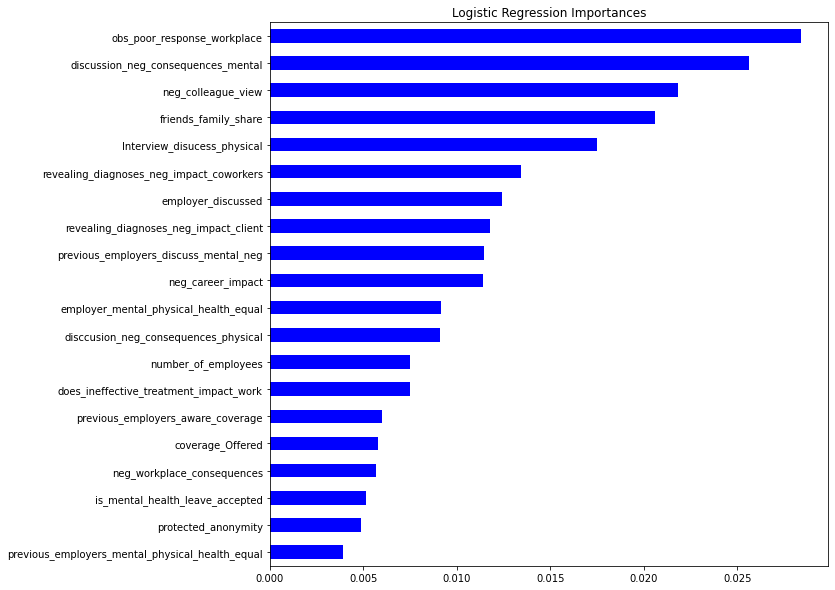

In [594]:
log_p_importances = pd.Series(permuter.feature_importances_, log_perm_cols).sort_values()

n=20
plt.figure(figsize=(10, n/2))
plt.title('Logistic Regression Importances')
log_p_importances[-n:].plot.barh(color='blue');


## XGBoost

In [582]:
permuter_xgb = PermutationImportance(
                                 xgb_bst,
                                 scoring=acc_score,
                                 n_iter=100,
                                 random_state=42)

permuter_xgb.fit(X_train_enc, y_train)

PermutationImportance(estimator=Pipeline(steps=[('simpleimputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('standardscaler',
                                                 StandardScaler()),
                                                ('xgbclassifier',
                                                 XGBClassifier(base_score=0.5680628272251309,
                                                               booster='gbtree',
                                                               colsample_bylevel=1,
                                                               colsample_bynode=1,
                                                               colsample_bytree=1,
                                                               gamma=0,
                                                               gpu_id=-1,
                                                               importan

In [583]:
permuted_xgb = eli5.explain_weights_df(
        permuter_xgb,
        top=None,
        feature_names=transformed_cols,
)

In [584]:
low_importances = permuted_xgb[permuted_xgb['weight'].abs() < 0.001]

low_import_features = low_importances['feature']

X_train_perm = X_train_enc.drop(columns = low_import_features)

perm_cols = X_train_perm.columns.to_list()

In [585]:
xgb_bst.fit(X_train_perm, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5680628272251309, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.698854678722973,
                               max_delta_step=0, max_depth=1804,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=4,
                               n_jobs=-1, num_parallel_tree=252,
                               objective='multi:softprob', random_state=42,
                               reg_alpha=3, reg_lambda=3, scale_pos_weight=None,
          

In [586]:
mean_cv_scr_xgb_bst = cross_val_score(xgb_bst, X_train_enc, y_train, cv=5, scoring=acc_score).mean();

mean_cv_scr_xgb_bst

0.6858667172963735

In [587]:
permuter_xgb = PermutationImportance(
                                 xgb_bst,
                                 scoring=acc_score,
                                 n_iter=100,
                                 random_state=42)

permuter_xgb.fit(X_train_perm, y_train)

PermutationImportance(estimator=Pipeline(steps=[('simpleimputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('standardscaler',
                                                 StandardScaler()),
                                                ('xgbclassifier',
                                                 XGBClassifier(base_score=0.5680628272251309,
                                                               booster='gbtree',
                                                               colsample_bylevel=1,
                                                               colsample_bynode=1,
                                                               colsample_bytree=1,
                                                               gamma=0,
                                                               gpu_id=-1,
                                                               importan

In [588]:
permuted_xgb = eli5.explain_weights_df(
        permuter_xgb,
        top=None,
        feature_names=perm_cols,
)

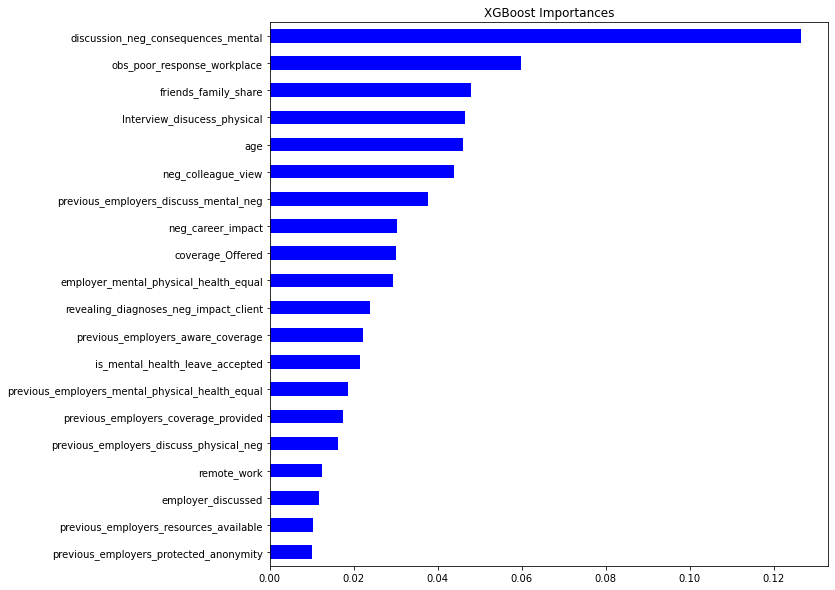

In [595]:
xgb_p_importances = pd.Series(permuter_xgb.feature_importances_, perm_cols).sort_values()

n=20
plt.figure(figsize=(10, n/2))
plt.title('XGBoost Importances')
xgb_p_importances[-n:].plot.barh(color='blue');

# Test Evaluation

In [590]:
X_test_perm = X_test_enc.drop(columns = low_log_import_features)

y_pred = log_bst.predict(X_test_perm)

test_score = accuracy_score(y_pred, y_test)

print(test_score);

0.6794425087108014
